In [1]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/기계학습/9주차 강의/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [2]:
# 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [3]:
# 3. 시퀀스 생성
window = 12   # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)

In [4]:
print('전체 데이터의 크기 :', len(X), len(y))

전체 데이터의 크기 : 313 313


In [5]:
train_size = int(len(y) * 0.7)
train_X = np.array(X[0 : train_size])
train_y = np.array(y[0 : train_size])

test_size = len(y) - train_size
test_X = np.array(X[train_size : len(X)])
test_y = np.array(y[train_size : len(y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (219, 12, 1) (219, 1)
테스트 데이터의 크기 : (94, 12, 1) (94, 1)


In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam', loss='mse')
model.fit(train_X, train_y, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0603
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010    
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.7997e-04
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.5872e-04
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.4483e-04
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.1332e-04
Epoch 13/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.3482e-04
Epoch 14/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.9262e-04
Epoch 15/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


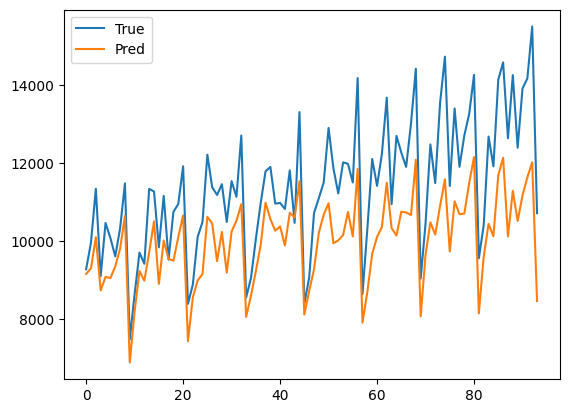

2442338.1390669784
1562.7981760505668


In [8]:
# 5. 예측
pred = model.predict(test_X)
plt.plot(scaler.inverse_transform(test_y), label='True')
plt.plot(scaler.inverse_transform(pred), label='Pred')
plt.legend(); plt.show()

# MSE를 구하기 위해 원래 크기로 변
y_test_original = scaler.inverse_transform(test_y)
pred_original = scaler.inverse_transform(pred)
mse = mean_squared_error(y_test_original, pred_original)
print(mse)
rmse = np.sqrt(mse)
print(rmse)